# Used car price prediction 

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from car owners of India.

The dataset for this model originates from [kaggle.](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) we'll start with
reading and exploring the data followed by predicting the prices.


# step1: importing all the essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import date

# step2: Data Pre Processing

loading data set

In [3]:
df = pd.read_csv('car dataset.csv')

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(6019, 13)

it seems that there are 13 features and 6019 data points in this dataset

# Exploratory Data Analysis

Let's explore the data and identify unique values 

In [6]:
len(df.Name.unique())

1876

now let's find the missing data.

Location should not be a determinant for the price of a car ..let's remove it.Also remove name column.

In [7]:
df1 = df.drop(['Name','Location'],axis=1)
df1.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

New_Price column has almost 90% missing data...so,let's remove it.

In [8]:
df2 = df1.drop(['New_Price'],axis=1)

In [9]:
df2.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

here (Fuel_Type,Transmission,Owner_Type,Mileage,engine,Power) are categorical data.let's convert them to numeric values.  

In [10]:
df2['Mileage'] = df2['Mileage'].str.replace('kmpl', '')
df2['Mileage'] = df2['Mileage'].str.replace('km/kg', '')
df2['Mileage'] = df2['Mileage'].str.replace('null', '0')
df2['Engine'] = df2['Engine'].str.replace('CC', '')
df2['Engine'] = df2['Engine'].str.replace('null', '0')
df2['Power'] = df2['Power'].str.replace('bhp', '')
df2['Power'] = df2['Power'].str.replace('null', '0')


extracting the numeric values of datapoints.

In [11]:
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Engine'] = df2['Engine'].astype(float)
df2['Power'] = df2['Power'].astype(float)
df2.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [12]:
df2.loc[df2.Engine == 0, 'Engine'] = np.NaN
df2.loc[df2.Power == 0, 'Power'] = np.NaN
df2.loc[df2.Mileage == 0, 'Mileage'] = np.NaN


replacing null values by the mean value of the column.

In [13]:
df2['Mileage'] = df2['Mileage'].fillna(df2['Mileage'].mean())
df2['Engine'] = df2['Engine'].fillna(df2['Engine'].mean())
df2['Power'] = df2['Power'].fillna(df2['Power'].mean())
df2['Seats'] = df2['Seats'].fillna(df2['Seats'].mean())


Year has no significance on its own unless we try to extract how old a car is .

In [14]:
now = date.today()
df2['Age'] = now.year-df2['Year']
df3 = df2.drop(['Year'],axis=1)
df3

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8
...,...,...,...,...,...,...,...,...,...,...
6014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,7
6015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,6
6016,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,9
6017,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,8


Getting statistical description about data

In [15]:
df3.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,18.342252,1621.276450,113.253050,5.278735,9.479468,7.641801
std,9.126884e+04,4.151120,599.553865,53.231019,0.806012,11.187917,3.269742
min,1.710000e+02,6.400000,72.000000,34.200000,0.000000,0.440000,2.000000
25%,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000,5.000000
50%,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000,7.000000
75%,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,23.000000


# step3: Data Visualization
let's see the count of the cars present based on the price.

(0.0, 70.0)

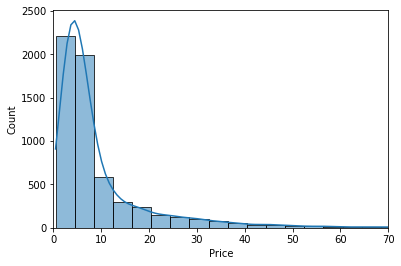

In [16]:
sns.histplot(df3,x="Price",binwidth=4,kde=True)
plt.xlim(0,70)

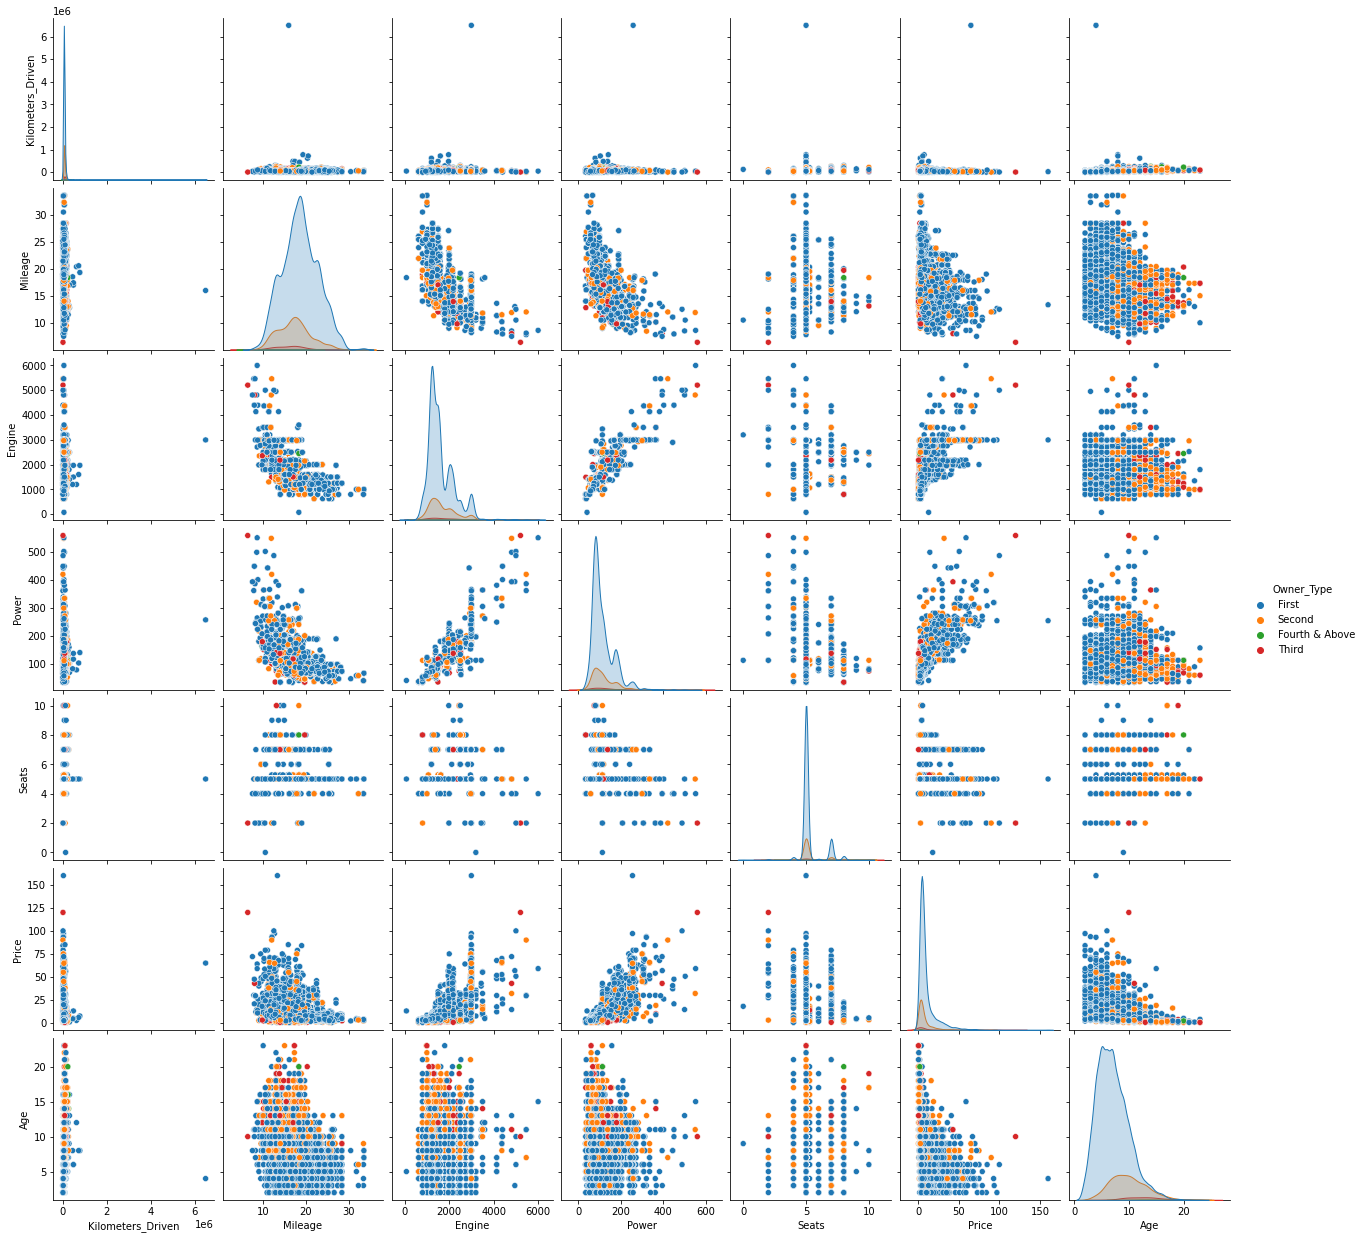

In [17]:
sns.pairplot(df3,hue='Owner_Type')

# step4:  Feature Engineering

one hot encoding to convert categorical variables to numeric variables

In [18]:
con_df = pd.get_dummies(df3[['Fuel_Type', 'Transmission', 'Owner_Type']],drop_first=True)
con_df.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,0
3,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0


In [20]:
df4=df3.drop(['Fuel_Type', 'Transmission', 'Owner_Type'],axis=1)
dfinal=pd.concat([df4,con_df],axis=1)
dfinal.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998.0,58.16,5.0,1.75,11,0,0,0,0,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,12.50,6,1,0,0,0,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,4.50,10,0,0,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,6.00,9,1,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,17.74,8,1,0,0,0,0,0,1,0


correlation with heat map

In [21]:
dfinal.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Kilometers_Driven,1.000000,-6.418931e-02,0.091029,0.033419,0.083072,-0.011493,0.173048,0.104441,-2.345021e-03,0.000549,-0.103907,0.025663,0.032659,0.062143,0.045405
Mileage,-0.064189,1.000000e+00,-0.639787,-0.548488,-0.342360,-0.329891,-0.290570,0.111266,5.748621e-17,0.010248,-0.144140,0.358558,-0.037124,-0.117119,-0.078155
Engine,0.091029,-6.397867e-01,1.000000,0.859020,0.393087,0.657118,0.051712,0.426749,-2.087046e-02,-0.040411,-0.406900,-0.499082,0.019378,0.042432,0.019114
Power,0.033419,-5.484878e-01,0.859020,1.000000,0.100200,0.767331,-0.013895,0.288974,-1.926825e-02,-0.040880,-0.268738,-0.638835,-0.004626,0.030194,0.003455
Seats,0.083072,-3.423600e-01,0.393087,0.100200,1.000000,0.052118,-0.012204,0.307573,-6.305379e-03,-0.014109,-0.301090,0.075250,0.041454,-0.004845,0.012242
Price,-0.011493,-3.298914e-01,0.657118,0.767331,0.052118,1.000000,-0.305327,0.320645,5.533751e-03,-0.025499,-0.309363,-0.586025,-0.021445,-0.073552,-0.055297
Age,0.173048,-2.905696e-01,0.051712,-0.013895,-0.012204,-0.305327,1.000000,-0.126185,-7.907273e-04,0.031919,0.127490,0.097059,0.077886,0.297913,0.231184
Fuel_Type_Diesel,0.104441,1.112660e-01,0.426749,0.288974,0.307573,0.320645,-0.126185,1.000000,-1.945705e-02,-0.043536,-0.977528,-0.141613,0.001790,-0.025779,-0.042125
Fuel_Type_Electric,-0.002345,5.748621e-17,-0.020870,-0.019268,-0.006305,0.005534,-0.000791,-0.019457,1.000000e+00,-0.000744,-0.016699,-0.028823,-0.000706,-0.007981,-0.002522
Fuel_Type_LPG,0.000549,1.024823e-02,-0.040411,-0.040880,-0.014109,-0.025499,0.031919,-0.043536,-7.437447e-04,1.000000,-0.037366,0.025804,-0.001579,0.004350,-0.005643


<AxesSubplot:>

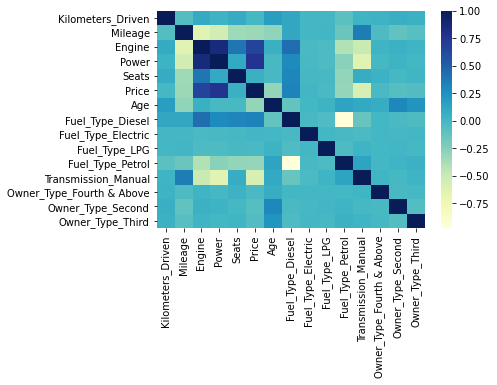

In [22]:
sns.heatmap(dfinal.corr(),cmap="YlGnBu")

here we can alnalize how the features are related to each other

In [23]:
dfinal.shape

(6019, 15)

now the data is ready for training

# step 5: Modeling
before training let's seperate features and labels 

In [24]:
y = dfinal.Price
x = dfinal.drop('Price',axis=1)
x

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998.0,58.16,5.0,11,0,0,0,0,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,6,1,0,0,0,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,10,0,0,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,9,1,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,8,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,1248.0,74.00,5.0,7,1,0,0,0,1,0,0,0
6015,100000,24.40,1120.0,71.00,5.0,6,1,0,0,0,1,0,0,0
6016,55000,14.00,2498.0,112.00,8.0,9,1,0,0,0,1,0,1,0
6017,46000,18.90,998.0,67.10,5.0,8,0,0,0,1,1,0,0,0


splitting the dataset for training and testing.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4815, 14)
(4815,)
(1204, 14)
(1204,)


finding the best-fit model by using k-fold crossvalidation.

In [27]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection


Lreg:linearregression,KNN:k-nearest neighbours,RF:random forest regressor,Dtree:decisiontree regressor

In [28]:
models=[]
models.append(('Lreg',linear_model.LinearRegression()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("Dtree",DecisionTreeRegressor()))

typ=[]
res=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    res.append(score)
    typ.append(name)
    print(name,score.mean(),score.std())

Lreg 0.6855332745233971 0.04665395768259272
KNN 0.532475042877547 0.052101862386492
RF 0.8733161881622491 0.057031326454991954
Dtree 0.7802763868644924 0.07635015283127965


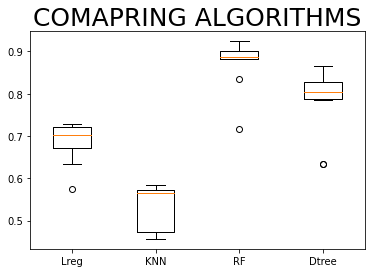

In [29]:
plt.boxplot(res,labels=typ)
plt.title('COMAPRING ALGORITHMS',fontsize=25)
plt.show()

from the above plot randomforestregression is the best

# Training and predicting
here we use RandomForest Regressor to train on data.

In [30]:
from sklearn.metrics import r2_score
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_train_predicted=rf.predict(X_train)
Y_test_predicted=rf.predict(X_test)
print("Train set accuracy: ",r2_score(Y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(Y_test,Y_test_predicted))


Train set accuracy:  0.97904996755216
Test set accuracy :  0.9105183668230374


In [31]:
print(rf.score(X_train,Y_train))

0.97904996755216


In [32]:
print(rf.score(X_test,Y_test))

0.9105183668230374


In [37]:
import pickle
pickle.dump(rf,open('predict_model.pkl','wb'))

In [39]:
model = pickle.load(open('predict_model.pkl', 'rb'))